In [41]:
# Importing the required Libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [42]:
def read_dataset():
    df = pd.read_csv("C:/Users/18579/Desktop/data/all_data.csv")
    # X and y are np arrays
    X = df[df.columns[0:60]].values
    y = df[df.columns[60]]
    
    # Encode the dependent variable
    encoder = LabelEncoder()
    encoder.fit(y)
    #encoder.classes_
    y = encoder.transform(y)
    Y = one_hot_encode(y)
    return X,Y

In [43]:
def one_hot_encode(y):
    n_labels = len(y)
    n_unique_labels = len(np.unique(y))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels),y] = 1
    return one_hot_encode

In [44]:
def multilayer_perceptron(x, weights, biases):
    
    # Hidden layer with sigmoid activated
    layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    # Hidden layer with sigmoid activated
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    # Hidden layer with sigmoid activated
    layer_3 = tf.add(tf.matmul(layer_2,weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    # Hidden layer with RELU activated
    layer_4 = tf.add(tf.matmul(layer_3,weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    # Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']+biases['out'])
    return out_layer


In [45]:
# Read the dataset
X, Y = read_dataset()

In [46]:
# Shuffle the dataset to mix up the rows
X, Y = shuffle(X, Y, random_state = 1)

In [47]:
# Convert the dataset into train and test part
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=415)

In [48]:
# Inspect the shape of the training and testing
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(165, 60)
(165, 2)
(42, 60)
(42, 2)


In [49]:
# Define the important parametrs and variables to work with the tensors
learning_rate = 0.02
training_epochs = 1000
cost_history = np.empty(shape = [1], dtype=float)
n_dim = X.shape[1]
print("n_dim",n_dim)

n_dim 60


In [50]:
n_class = 2
model_path = "C:/Users/18579/Desktop/data/model"

In [51]:
# Define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 60
n_hidden_2 = 70
n_hidden_3 = 70
n_hidden_4 = 60

In [52]:
x = tf.placeholder(tf.float32,[None,n_dim]) # None means any value
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_true = tf.placeholder(tf.float32,[None,n_class])


In [53]:
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4,n_class]))
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

In [54]:
# Initialize all the variables
init = tf.global_variables_initializer()

In [55]:
# Saver object to save our model
saver = tf.train.Saver()

In [56]:
# Call your model defined
y = multilayer_perceptron(x, weights, biases)

In [57]:
# Define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_true))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

W0831 15:24:23.143898 12948 deprecation.py:323] From <ipython-input-57-ba49a8a1609b>:2: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [58]:
# Calculate the cost and accuracy for each epoch

mse_history = []
accuracy_history = []
print("**")
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

**
(165, 60)
(165, 2)
(42, 60)
(42, 2)


In [59]:
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x:train_x, y_true:train_y})
    cost = sess.run(cost_function, feed_dict={x:train_x, y_true:train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    pred_y = sess.run(y,feed_dict={x:test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = sess.run(accuracy,feed_dict={x: train_x, y_true:train_y})
    accuracy_history.append(accuracy)
    
    print('epoch: ',epoch,' - ','cost:',cost,' -MSE:',mse_," -Train Accuracy: ",accuracy)
save_path = saver.save(sess, model_path)

epoch:  0  -  cost: 118.05241  -MSE: 21372.425003772398  -Train Accuracy:  0.54545456
epoch:  1  -  cost: 4.818637  -MSE: 2855.348740675813  -Train Accuracy:  0.54545456
epoch:  2  -  cost: 63.930485  -MSE: 6064.228398069936  -Train Accuracy:  0.45454547
epoch:  3  -  cost: 12.591949  -MSE: 2106.2248626365526  -Train Accuracy:  0.54545456
epoch:  4  -  cost: 30.910059  -MSE: 2431.4816693915245  -Train Accuracy:  0.45454547
epoch:  5  -  cost: 12.799624  -MSE: 1594.8125275379346  -Train Accuracy:  0.54545456
epoch:  6  -  cost: 16.89283  -MSE: 1401.1995387395746  -Train Accuracy:  0.45454547
epoch:  7  -  cost: 11.742056  -MSE: 1209.8005834663259  -Train Accuracy:  0.54545456
epoch:  8  -  cost: 8.290538  -MSE: 928.2610883974414  -Train Accuracy:  0.45454547
epoch:  9  -  cost: 11.815238  -MSE: 1002.2394359431762  -Train Accuracy:  0.54545456
epoch:  10  -  cost: 2.7838776  -MSE: 691.6013343569184  -Train Accuracy:  0.45454547
epoch:  11  -  cost: 11.649957  -MSE: 855.0560154717135  -Tr

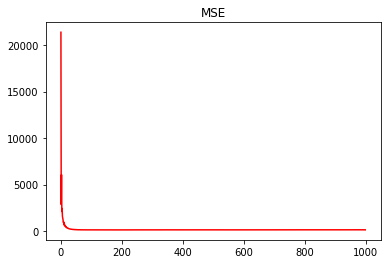

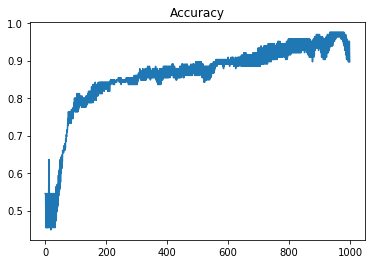

Test Accuracy:  0.85714287
MSE: 137.5585


In [60]:
# Plot MSE and accuracy graph
plt.title("MSE")
plt.plot(mse_history,'r')
plt.show()
plt.title("Accuracy")
plt.plot(accuracy_history)
plt.show()
    
# Print the final accuracy
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Test Accuracy: ",(sess.run(accuracy, feed_dict={x:test_x, y_true:test_y})))

# Print final MSE
pred_y = sess.run(y, feed_dict={x:test_x})
mse = tf.reduce_mean(tf.square(pred_y-test_y))
print("MSE: %.4f"%sess.run(mse))